# import all the image and bin crop

## import image 

In [91]:
#old file name
names = ["0v.png",
         "0.3v.png",
         "0.6v.png",
         "0.9v.png",
         "1.2v.png",
         "1.5v.png",
         "1.8v.png",
         "2.1v.png",
         "2.4v.png",
         "2.7v.png",
         "3v.png"]
paths_y = ["/Users/qingjunwang/Documents/image files/calibration_resonate_shaking_0603"] * len(names)
filenames_y = [paths_y[i] + names[i] for i in range(len(names))]
#print(filenames_y)

paths_x = ["/Users/qingjunwang/Documents/image files/voltage-strokes relationship/x-axis-redo2/177.4hz-"] * len(names)
filenames_x = [paths_x[i] + names[i] for i in range(len(names))]
#print(filenames_x)

import cv2
from scipy import ndimage
# Load the images
img_y = [cv2.imread(filenames_y[i], cv2.IMREAD_GRAYSCALE) for i in range(len(names))]
img_x = [cv2.imread(filenames_x[i], cv2.IMREAD_GRAYSCALE) for i in range(len(names))]

[ WARN:0@180777.810] global loadsave.cpp:248 findDecoder imread_('/Users/qingjunwang/Documents/image files/calibration_resonate_shaking_06030v.png'): can't open/read file: check file path/integrity
[ WARN:0@180777.811] global loadsave.cpp:248 findDecoder imread_('/Users/qingjunwang/Documents/image files/calibration_resonate_shaking_06030.3v.png'): can't open/read file: check file path/integrity
[ WARN:0@180777.811] global loadsave.cpp:248 findDecoder imread_('/Users/qingjunwang/Documents/image files/calibration_resonate_shaking_06030.6v.png'): can't open/read file: check file path/integrity
[ WARN:0@180777.811] global loadsave.cpp:248 findDecoder imread_('/Users/qingjunwang/Documents/image files/calibration_resonate_shaking_06030.9v.png'): can't open/read file: check file path/integrity
[ WARN:0@180777.811] global loadsave.cpp:248 findDecoder imread_('/Users/qingjunwang/Documents/image files/calibration_resonate_shaking_06031.2v.png'): can't open/read file: check file path/integrity
[ 

In [ ]:
img_y[0].shape

In [66]:
#load autocaptured image
import os
import cv2

# Define the source directories where the images are stored
# source_dir1 = "/Users/qingjunwang/Documents/image files/10Hzshift/ch1" 
# source_dir2 = "/Users/qingjunwang/Documents/image files/10Hzshift/ch2"
source_dir1 = "/Users/qingjunwang/Downloads/XY 0-80 @100Hz - Target Again" #for axis1
source_dir2 = "/Users/qingjunwang/Downloads/XY 0-80 @100Hz - Target Again" #for axis2


files_with_values_ch1 = []
files_with_values_ch2 = []

# Function to process files in a directory
def process_files(source_dir, channel_prefix):
    files_with_values = []
    for filename in os.listdir(source_dir):
        if filename.endswith(".png"):  # Check if the file is a PNG image
            parts = filename.split('_')
            for part in parts:
                if part.startswith(channel_prefix):
                    value = float(part[3:])
                    files_with_values.append((os.path.join(source_dir, filename), value))
                    break
    files_with_values.sort(key=lambda x: x[1])  # Sort the list of files based on the value
    return files_with_values


values_array_ch1 = []
values_array_ch2 = []

# Process files for each channel
#for amplitude
files_with_values_ch1 = process_files(source_dir1, "1HL")
files_with_values_ch2 = process_files(source_dir2, "2HL")
for file, value in files_with_values_ch1:
    print(f"Filename: {file}, 1HL Value: {value}")
    values_array_ch1.append(value)
for file, value in files_with_values_ch2:
    print(f"Filename: {file}, 2HL Value: {value}")
    values_array_ch2.append(value)

#for frequency
# files_with_values_ch1 = process_files(source_dir1, "1fq")
# files_with_values_ch2 = process_files(source_dir2, "2fq")
# for file, value in files_with_values_ch1:
#     print(f"Filename: {file}, 1fq Value: {value}")
#     values_array_ch1.append(value)
# for file, value in files_with_values_ch2:
#     print(f"Filename: {file}, 2fq Value: {value}")
#     values_array_ch2.append(value)



# Load the images using OpenCV
img_ch1 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file, _ in files_with_values_ch1]
img_ch2 = [cv2.imread(file, cv2.IMREAD_GRAYSCALE) for file, _ in files_with_values_ch2]

# If you need to perform operations on these images, you can continue from here

Filename: /Users/qingjunwang/Downloads/XY 0-80 @100Hz - Target Again/Snapshot_A-0V_31-07-2024_18-04-58_1fq100.0_1HL0.0_1LL0.0_1Ph0.0_2fq100.0_2HL0.0_2LL0.0_2Ph90.0_Exp50033.441_Ga25.0.png, 1HL Value: 0.0
Filename: /Users/qingjunwang/Downloads/XY 0-80 @100Hz - Target Again/Snapshot_B-0.5V_31-07-2024_18-05-08_1fq100.0_1HL0.5_1LL0.0_1Ph0.0_2fq100.0_2HL0.5_2LL0.0_2Ph90.0_Exp50033.441_Ga25.0.png, 1HL Value: 0.5
Filename: /Users/qingjunwang/Downloads/XY 0-80 @100Hz - Target Again/Snapshot_C-1V_31-07-2024_18-05-18_1fq100.0_1HL1.0_1LL0.0_1Ph0.0_2fq100.0_2HL1.0_2LL0.0_2Ph90.0_Exp50033.441_Ga25.0.png, 1HL Value: 1.0
Filename: /Users/qingjunwang/Downloads/XY 0-80 @100Hz - Target Again/Snapshot_D-1.5V_31-07-2024_18-05-27_1fq100.0_1HL1.5_1LL0.0_1Ph0.0_2fq100.0_2HL1.5_2LL0.0_2Ph90.0_Exp50033.441_Ga25.0.png, 1HL Value: 1.5
Filename: /Users/qingjunwang/Downloads/XY 0-80 @100Hz - Target Again/Snapshot_E-2V_31-07-2024_18-05-37_1fq100.0_1HL2.0_1LL0.0_1Ph0.0_2fq100.0_2HL2.0_2LL0.0_2Ph90.0_Exp50033.441_Ga2

## bin and crop image

In [67]:
def bin_return_array(img):
    from skimage import io
    import numpy as np
    from skimage.util import view_as_blocks
    import matplotlib.pyplot as plt
    from PIL import Image
    # Load the images
    #image1 = io.imread(filenames[filenum])
    block_size = (6, 6)
    # Convert the image to a numpy array
    array = np.array(img)
    #array1_cropped = array1[:4500,:4500] 
    binned_array = np.mean(view_as_blocks(array, block_size), axis=(-1, -2))
    return binned_array

def crop_array_x(array):
    x=[250,500]
    y=[400,800] 
    crop_x_width=y[1]-y[0]
    return array[x[0]:x[1],y[0]:y[1]],crop_x_width  

def crop_array_y(array):
    x=[250,500]
    y=[400,800]
    crop_y_width=x[1]-y[0]
    return array[x[0]:x[1],y[0]:y[1]],crop_y_width

In [68]:
img_ch1_bin = [bin_return_array(img_ch1[i]) for i in range(len(img_ch1))]
img_ch2_bin = [bin_return_array(img_ch2[i]) for i in range(len(img_ch2))]
# Apply the function to each element in img_x_bin
img_ch1_bin_crop = [crop_array_x(img_ch1_bin[i])[0] for i in range(len(img_ch1))]
_, crop_ch1_width = crop_array_x(img_ch1_bin[0])
img_ch2_bin_crop = [crop_array_y(img_ch2_bin[i])[0] for i in range(len(img_ch2))]
_, crop_ch2_width = crop_array_y(img_ch2_bin[0])

In [48]:
crop_ch1_width,crop_ch2_width

(400, 100)

In [ ]:
img_y_bin[0].shape

In [ ]:
len(img_y_bin)

In [ ]:
img_y_bin_crop[0].shape

In [ ]:
len(img_y_bin_crop)

In [7]:
len(img_ch1_bin)


7

## crop the important area

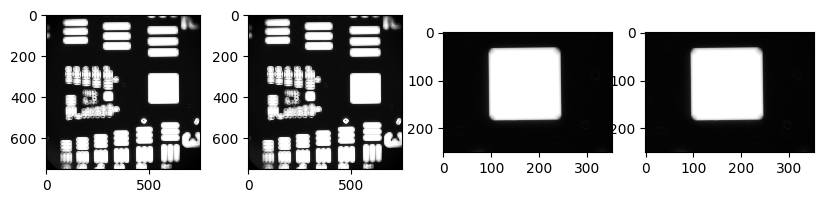

In [69]:
import matplotlib.pyplot as plt
# Create a figure with 1 row and 2 columns
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(10, 2))
# Display img1 in the first subplot
len(img_ch1_bin)
im1 = axs[0].imshow(img_ch1_bin[len(img_ch1_bin)-1], cmap='gray',interpolation='none')
im1 = axs[1].imshow(img_ch2_bin[len(img_ch1_bin)-1], cmap='gray',interpolation='none')
im1 = axs[2].imshow(img_ch1_bin_crop[len(img_ch1_bin)-1], cmap='gray',interpolation='none')
im1 = axs[3].imshow(img_ch2_bin_crop[len(img_ch1_bin)-1], cmap='gray',interpolation='none')

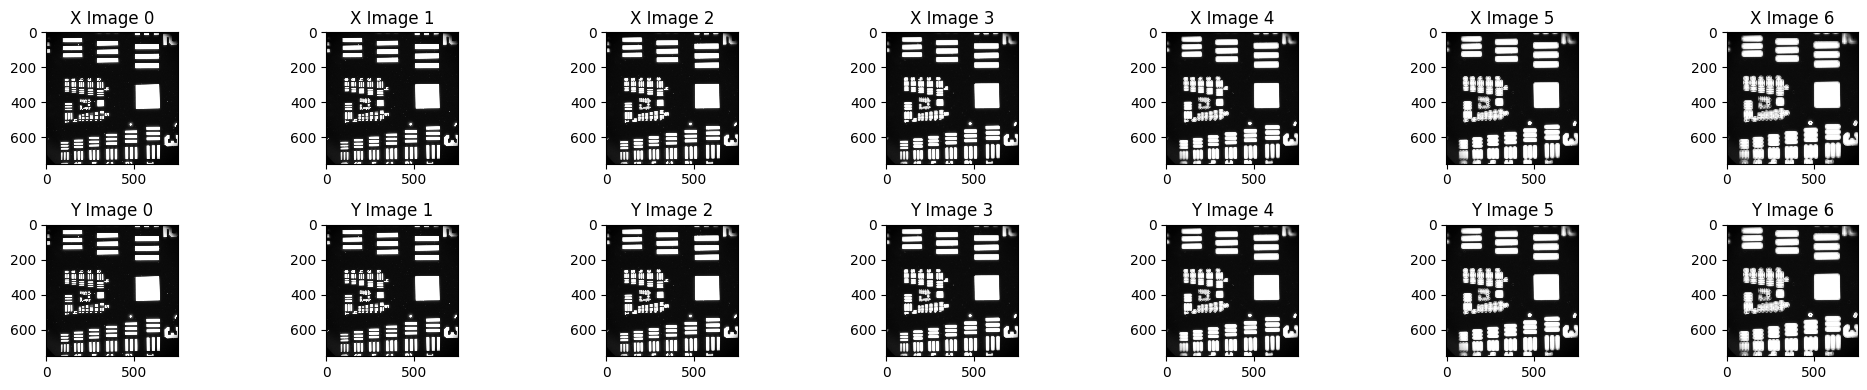

In [70]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 10 columns
fig, axs = plt.subplots(nrows=2, ncols=len(img_ch1_bin), figsize=(20, 4))

# Display each image in a subplot
for i in range(len(img_ch1_bin)):
    axs[0, i].imshow(img_ch1_bin[i], cmap='gray', interpolation='none')
    axs[0, i].set_title(f'X Image {i}')
for i in range(len(img_ch2_bin)):
    axs[1, i].imshow(img_ch2_bin[i], cmap='gray', interpolation='none')
    axs[1, i].set_title(f'Y Image {i}')

# Show the plot
plt.tight_layout()
plt.show()

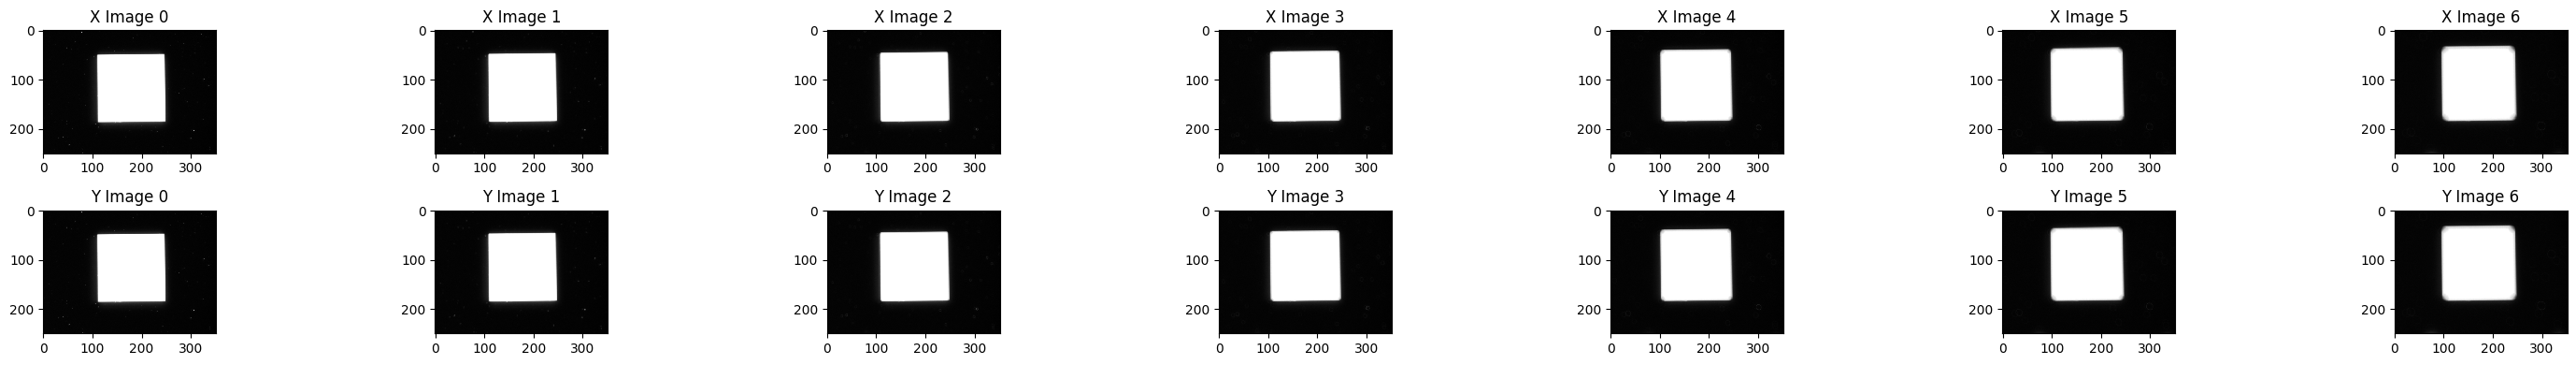

In [71]:
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 10 columns
fig, axs = plt.subplots(nrows=2, ncols=len(img_ch1_bin), figsize=(30, 4))

# Display each image in a subplot
for i in range(len(img_ch1_bin_crop)):
    axs[0, i].imshow(img_ch1_bin_crop[i], cmap='gray', interpolation='none')
    axs[0, i].set_title(f'X Image {i}')
for i in range(len(img_ch2_bin_crop)):
    axs[1, i].imshow(img_ch2_bin_crop[i], cmap='gray', interpolation='none')
    axs[1, i].set_title(f'Y Image {i}')

# Show the plot
plt.tight_layout()
plt.show()

# process xy axis movement

## check the sum range

In [72]:
#modify the first value
print(f"range of sum in y is {1*6*2.7/4:.2f} um in LCOS plane")

range of sum in y is 4.05 um in LCOS plane


## check the "bright" threshold

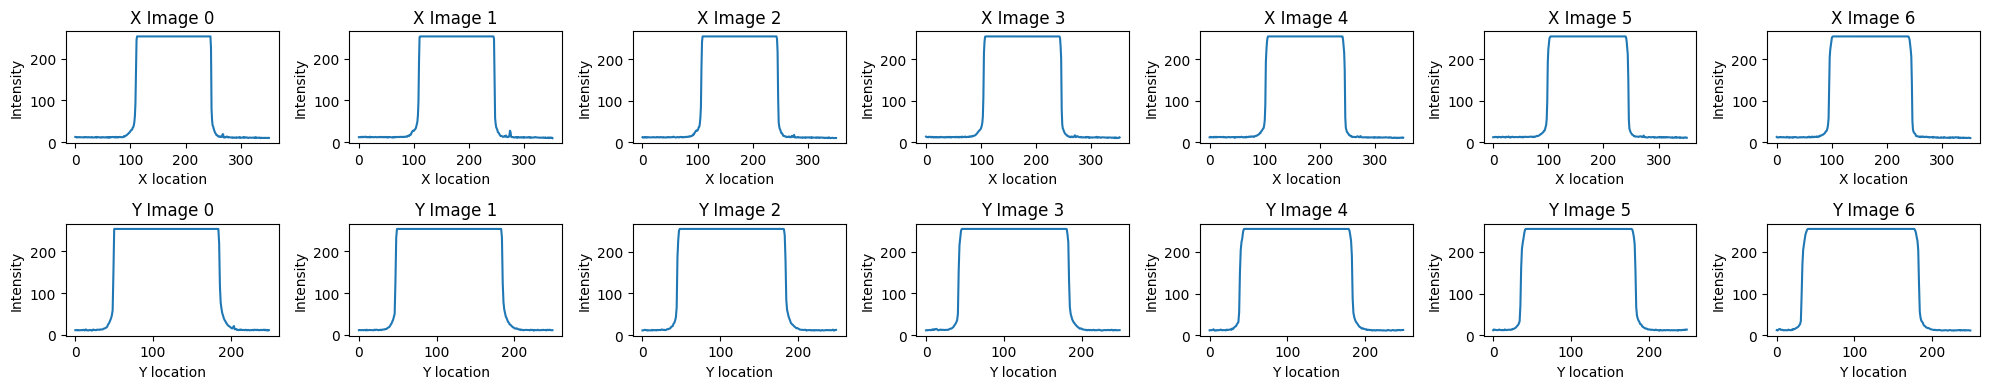

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 2 rows and 10 columns
fig, axs = plt.subplots(nrows=2, ncols=len(img_ch1_bin), figsize=(20, 4))

# For each image in img_x_bin_crop and img_y_bin_crop
for i in range(len(img_ch1_bin)):
    # Convert the images to numpy arrays
    image_array_x = np.array(img_ch1_bin_crop[i])
    image_array_y = np.array(img_ch2_bin_crop[i])

    # Select a row from the middle of each image in img_x_bin_crop
    row_x = image_array_x[image_array_x.shape[0] // 2, :]

    # Select a column from the middle of each image in img_y_bin_crop
    column_y = image_array_y[:, image_array_y.shape[1] // 2]

    # Plot the intensity distribution in subplots
    axs[0, i].plot(row_x)
    axs[0, i].set_title(f'X Image {i}')
    axs[0, i].set_xlabel('X location')
    axs[0, i].set_ylabel('Intensity')

    axs[1, i].plot(column_y)
    axs[1, i].set_title(f'Y Image {i}')
    axs[1, i].set_xlabel('Y location')
    axs[1, i].set_ylabel('Intensity')

# Show the plot
plt.tight_layout()
plt.show()

/var/folders/0r/tf9tj8xj6t986pfvvhtz7f5c0000gn/T/ipykernel_79410/3641534074.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_bend_x[i] = indices_x[-1] if indices_x.size > 0 else None
/var/folders/0r/tf9tj8xj6t986pfvvhtz7f5c0000gn/T/ipykernel_79410/3641534074.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_bend_y[i] = indices_y[-1] if indices_y.size > 0 else None


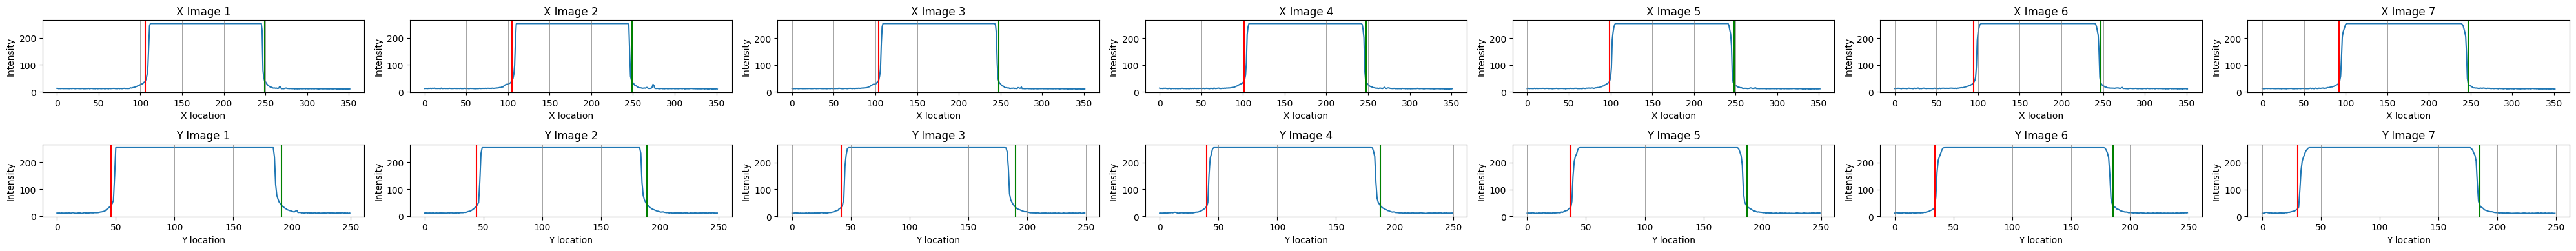

first_bend_x:[106. 105. 104. 101.  99.  95.  92.]
last_bend_x:[249. 249. 248. 248. 248. 247. 247.]
first_bend_y:[46. 44. 42. 40. 37. 34. 30.]
last_bend_y:[191. 189. 190. 188. 187. 186. 185.]


In [77]:
# find the width
import numpy as np
from scipy.ndimage import uniform_filter1d, gaussian_filter1d
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 10 columns
fig, axs = plt.subplots(nrows=2, ncols=len(img_ch1_bin), figsize=(40, 4))
first_bend_x = np.zeros(len(img_ch1_bin_crop))
first_bend_y = np.zeros(len(img_ch2_bin_crop))
last_bend_x = np.zeros(len(img_ch1_bin_crop))
last_bend_y = np.zeros(len(img_ch2_bin_crop))
# For each image in img_x_bin_crop and img_y_bin_crop
for i in range(len(img_ch1_bin_crop)):
    # Convert the images to numpy arrays
    image_array_x = np.array(img_ch1_bin_crop[i])
    image_array_y = np.array(img_ch2_bin_crop[i])

    # Select a row from the middle of each image in img_x_bin_crop
    row_x = image_array_x[image_array_x.shape[0] // 2, :]
    # Select a column from the middle of each image in img_y_bin_crop
    column_y = image_array_y[:, image_array_y.shape[1] // 2]

    # Smooth the intensity values using a moving average filter
    row_x = uniform_filter1d(row_x, size=1)
    column_y = uniform_filter1d(column_y, size=1)
    
    # Calculate the derivative of the intensity values
    derivative_x = np.gradient(row_x)
    derivative_y = np.gradient(column_y)

    # Calculate the angle of the derivative
    angle_x = np.arctan(derivative_x) * 180 / np.pi
    angle_y = np.arctan(derivative_y) * 180 / np.pi

    # Create an array of x values for each row/column
    x_values_x = np.arange(len(row_x))
    x_values_y = np.arange(len(column_y))
    
    # Find the first x-location where the angle exceeds 60 degrees, the intensity jump is more than 20, and the x value is larger than 50
    first_bend_x[i] = np.argmax((np.abs(angle_x) > 65) & (np.abs(derivative_x) > 5) & (x_values_x > 50))
    first_bend_y[i] = np.argmax((np.abs(angle_y) > 65) & (np.abs(derivative_y) > 5) & (x_values_y > 10))

    
    # Find the indices where the angle exceeds 60 degrees, the intensity jump is more than 20, and the x value is larger than 50
    indices_x = np.argwhere((np.abs(angle_x) > 30) & (np.abs(derivative_x) > 5) & (x_values_x < 270))
    last_bend_x[i] = indices_x[-1] if indices_x.size > 0 else None
    indices_y = np.argwhere((np.abs(angle_y) > 30) & (np.abs(derivative_y) > 5) & (x_values_y < 350))
    last_bend_y[i] = indices_y[-1] if indices_y.size > 0 else None


    # Plot the intensity distribution in subplots
    axs[0, i].plot(row_x)
    axs[0, i].axvline(first_bend_x[i], color='r')  # Draw a vertical line at the point of first sharp bend
    #print(first_bend_x)
    axs[0, i].axvline(last_bend_x[i], color='g')  # Draw a vertical line at the point of last sharp bend
    axs[0, i].set_title(f'X Image {i+1}')
    axs[0, i].set_xlabel('X location')
    axs[0, i].set_ylabel('Intensity')

    axs[1, i].plot(column_y)
    axs[1, i].axvline(first_bend_y[i], color='r')  # Draw a vertical line at the point of first sharp bend    axs[0, i].axvline(last_bend_x, color='g')  # Draw a vertical line at the point of last sharp bend
    axs[1, i].axvline(last_bend_y[i], color='g')  # Draw a vertical line at the point of last sharp bend
    axs[1, i].set_title(f'Y Image {i+1}')
    axs[1, i].set_xlabel('Y location')
    axs[1, i].set_ylabel('Intensity')
        # Add a grid in the y-direction
    for x in range(0, int(axs[1, i].get_xlim()[1]), 50):  # Adjust the range and step as needed
        axs[0, i].axvline(x, color='gray', linewidth=0.5)
        axs[1, i].axvline(x, color='gray', linewidth=0.5)
#first_bend_x.shape
# Show the plot
plt.tight_layout()
plt.show()
print(f"first_bend_x:{first_bend_x}")
print(f"last_bend_x:{last_bend_x}")
print(f"first_bend_y:{first_bend_y}")
print(f"last_bend_y:{last_bend_y}")

In [100]:
?first_bend_x

Type:        ndarray
String form:
[179. 178. 177. 176. 173. 170. 165. 154. 133. 115. 137. 156. 165. 169.
 173. 175. 177. 178.]
Length:      18
File:        ~/Library/Python/3.9/lib/python/site-packages/numpy/__init__.py
Docstring:  
ndarray(shape, dtype=float, buffer=None, offset=0,
        strides=None, order=None)

An array object represents a multidimensional, homogeneous array
of fixed-size items.  An associated data-type object describes the
format of each element in the array (its byte-order, how many bytes it
occupies in memory, whether it is an integer, a floating point number,
or something else, etc.)

Arrays should be constructed using `array`, `zeros` or `empty` (refer
to the See Also section below).  The parameters given here refer to
a low-level method (`ndarray(...)`) for instantiating an array.

For more information, refer to the `numpy` module and examine the
methods and attributes of an array.

Parameters
----------
(for the __new__ method; see Notes below)

shape : tu

In [78]:
import numpy as np
# Convert the lists to numpy arrays
first_bend_x = np.array(first_bend_x.astype(float))
last_bend_x = np.array(last_bend_x.astype(float))
first_bend_y = np.array(first_bend_y.astype(float))
last_bend_y = np.array(last_bend_y.astype(float))

In [79]:
first_bend_x

array([106., 105., 104., 101.,  99.,  95.,  92.])

## find the rotate angle 

In [ ]:
from scipy.ndimage import rotate
import matplotlib.pyplot as plt

# Create a figure with 2 rows and 11 columns
fig, axs = plt.subplots(nrows=2, ncols=11, figsize=(22, 4))

# Rotate and display the images for each angle from 0 to 10 degrees
for i in range(11):
    # Rotate the images
    rotated_img_x = rotate(img_x_bin_crop[10], i, mode='wrap')
    rotated_img_y = rotate(img_y_bin_crop[10], i+5, mode='wrap')

    # Display the rotated images in subplots
    axs[0, i].imshow(rotated_img_x, cmap='gray', interpolation='none')
    axs[0, i].set_title(f'{i} degrees')
    axs[0, i].axis('off')

    axs[1, i].imshow(rotated_img_y, cmap='gray', interpolation='none')
    axs[1, i].set_title(f'{i+5} degrees')
    axs[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [81]:
# record x rotate angle
x_angle=0
y_angle=0

## calculate the width

In [87]:
x_difference=last_bend_x-first_bend_x
y_difference=last_bend_y-first_bend_y
x_difference_correct_rot=x_difference/np.cos(np.radians(x_angle))
y_difference_correct_rot=y_difference/np.cos(np.radians(y_angle))
print(x_difference_correct_rot[0],y_difference_correct_rot[0])

#reference length see slides: https://docs.google.com/presentation/d/1Zs2V_uwjUcaxqrDkJE9gdee_BkdDxu_t/edit#slide=id.g2e0f6bc52d7_0_667
original_y_width=0.56 #mm
# original_x_width=(x_difference_correct_rot[0]/y_difference_correct_rot[0])*0.5 #its almost 1mm
original_x_width=0.56 #mm
range_x=[((x_difference_correct_rot[i]-x_difference_correct_rot[0])/x_difference_correct_rot[0])*original_x_width for i in range(len(img_ch1))]
range_y=[((y_difference_correct_rot[i]-y_difference_correct_rot[0])/y_difference_correct_rot[0])*original_y_width for i in range(len(img_ch2))]

#amplitude= width broadening/2
amplitude_x=[range_x[i]/2 for i in range(len(img_ch1))]
amplitude_y=[range_y[i]/2 for i in range(len(img_ch2))]
print("Amplitude X values:")
for amp in amplitude_x:
    print(f"{amp:.4f}")
# Print each element in the amplitude_y list formatted to two decimal places
print("Amplitude Y values:")
for amp in amplitude_y:
    print(f"{amp:.4f}")

143.0 145.0
Amplitude X values:
0.0000
0.0020
0.0020
0.0078
0.0117
0.0176
0.0235
Amplitude Y values:
0.0000
0.0000
0.0058
0.0058
0.0097
0.0135
0.0193


In [88]:
values_array_ch1 # voltages extract from file

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]

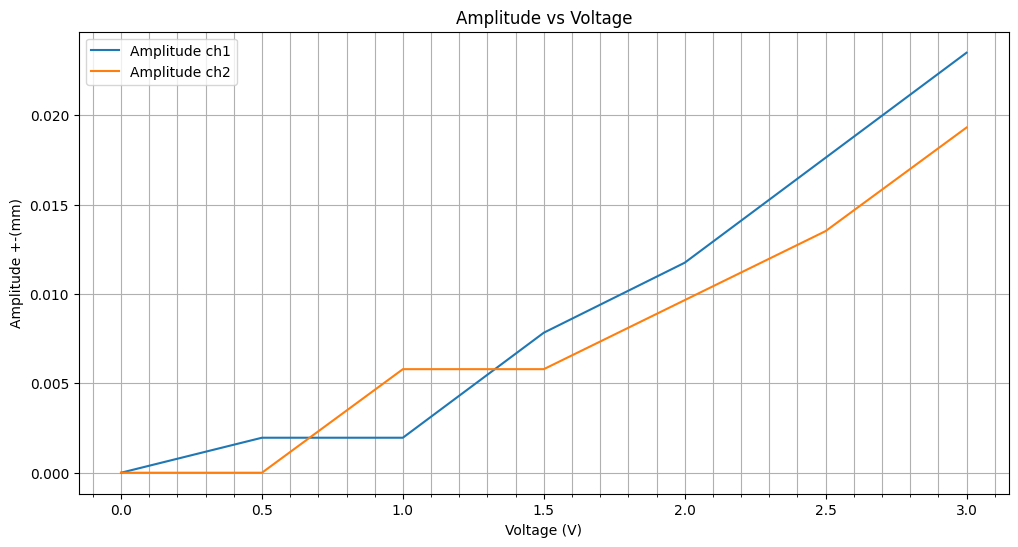

In [89]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot amplitude_x and amplitude_y against voltage
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(values_array_ch1, amplitude_x, label='Amplitude ch1')
ax.plot(values_array_ch2, amplitude_y, label='Amplitude ch2')

# Set the title and labels
ax.set_title('Amplitude vs Voltage')

ax.set_xlabel('Voltage (V)')
# ax.set_xlabel('frequency (Hz)')


ax.set_ylabel('Amplitude +-(mm)')

# Add a legend
ax.legend()

# Set the major ticks
ax.xaxis.set_major_locator(ticker.MultipleLocator(0.5))
# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.2))

# Set the minor ticks
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.1))
# ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

# Add a grid
ax.grid(which='both')

# Show the plot
plt.show()

# Save raw data

In [106]:
import pandas as pd

# Sample data: four arrays

# Create a DataFrame
df = pd.DataFrame({
    'frequency CH1': values_array_ch1,
    'Amplitude CH1': amplitude_x,
    'frequency CH2': values_array_ch2,
    'Amplitude CH2': amplitude_y
})

# Save the DataFrame to a CSV file
df.to_csv('/Users/qingjunwang/Documents/image files/10Hzshift/output_Q_raw_data.csv', index=False)

# Fit and back-calculate from amplitude array to voltage array

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.interpolate import interp1d

# New amplitude values for which we need to find corresponding voltages
new_amplitudes = np.array([0.02, 0.04, 0.06, 0.08, 0.1, 0.12,0.14,0.16])
# Create interpolation functions
interp_func_x = interp1d(amplitude_x, voltage, kind='linear', fill_value="extrapolate")
interp_func_y = interp1d(amplitude_y, voltage, kind='linear', fill_value="extrapolate")

# Calculate the corresponding voltages for new amplitudes
voltage_array_x = interp_func_x(new_amplitudes)
voltage_array_y = interp_func_y(new_amplitudes)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(voltage, amplitude_x, 'o-', label='Amplitude ch1')
ax.plot(voltage, amplitude_y, 's-', label='Amplitude ch2')
ax.plot(voltage_array_x, new_amplitudes, 'x', label='Interpolated ch1', markersize=10)
ax.plot(voltage_array_y, new_amplitudes, '^', label='Interpolated ch2', markersize=10)

# Set the title and labels
ax.set_title('Amplitude vs Voltage')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Amplitude (mm)')
ax.legend()
ax.grid(which='both')
plt.show()
voltage_array_x = [round(x,2) for x in voltage_array_x]
voltage_array_y = [round(x,2) for x in voltage_array_y]
print("Amplitude array:",new_amplitudes," in mm")
print("Interpolate voltage array for Channel 1:",voltage_array_x, "in V")
print("Interpolate voltage array for Channel 2:",voltage_array_y, "in V")
#for x in voltage_array_y:
    #print(x)

In [ ]:
#contrast extraction from image

In [ ]:
import cv2
from scipy import ndimage
filenames_1='/Users/qingjunwang/Documents/image files/RGB/'+'white-3v.bmp'
filenames_2='/Users/qingjunwang/Documents/image files/RGB/'+'white.bmp'

# Load the images
img0 = cv2.imread(filenames_1, cv2.IMREAD_GRAYSCALE)
img1 = cv2.imread(filenames_2, cv2.IMREAD_GRAYSCALE)

# Calculate the contrast for each image
contrast0 = img0.std() / img0.mean()
contrast1 = img1.std() / img1.mean()
import matplotlib.pyplot as plt

# Create a figure with 3 columns and 2 rows
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Define the colorbar range
vmin = 0
vmax = 255
# Add the images to each subplot
axs[0, 0].imshow(img0, cmap='gray', vmin=vmin, vmax=vmax,interpolation='none')
axs[0, 1].imshow(img1, cmap='gray', vmin=vmin, vmax=vmax,interpolation='none')


# Set the title for each subplot
fontsize = 10
axs[0, 0].set_title(f'contrast 160um 310um: {round(contrast0, 3)}', fontsize=fontsize)
axs[0, 1].set_title(f'contrast 90um 90um: {round(contrast1, 3)}', fontsize=fontsize)


# Hide the axis numbers for each subplot
for i in range(2):
    for j in range(4):
        axs[i,j].axis('off')
        
# Set the large title for the whole plot
plt.suptitle('Test amplitude, compare random sample and periodic sample', fontsize=12, y=1)
